In [ ]:
# Import required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
%matplotlib inline

import gdown

**Download here the tarfile with the images**

In [ ]:
#Original link
# https://drive.google.com/file/d/1zZsMjs_kHU_Yb47JbNKTaGTf-b4pW8i0/view?usp=sharing
!gdown "https://drive.google.com/uc?id=1zZsMjs_kHU_Yb47JbNKTaGTf-b4pW8i0"

Downloading...
From: https://drive.google.com/uc?id=1zZsMjs_kHU_Yb47JbNKTaGTf-b4pW8i0
To: /content/24-induced.tar.gz
123MB [00:01, 120MB/s] 


In [ ]:
!gunzip /content/24-induced.tar.gz

In [ ]:
!tar -xvf /content/24-induced.tar

tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
24-induced/
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
24-induced/30 uM Theophylline-07.czi
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended header keyword 'SCHILY.ino'
tar: Ignoring unknown extended header keyword 'SCHILY.nlink'
24-induced/30 uM Theophylline-06.czi
tar: Ignoring unknown extended header keyword 'LIBARCHIVE.creationtime'
tar: Ignoring unknown extended header keyword 'SCHILY.dev'
tar: Ignoring unknown extended

In [ ]:
!ls

24-induced  24-induced.tar  sample_data


In [ ]:
cd /content/24-induced/

/content/24-induced


In [ ]:
!ls

'30 uM Theophylline-02.czi'  '30 uM Theophylline-07.czi'
'30 uM Theophylline-03.czi'  '30 uM Theophylline-08.czi'
'30 uM Theophylline-04.czi'  '30 uM Theophylline-09.czi'
'30 uM Theophylline-05.czi'  '30 uM Theophylline.czi'
'30 uM Theophylline-06.czi'


In [ ]:
pip install cellpose==0.6.2

     |████████████████████████████████| 13.3MB 230kB/s 
     |████████████████████████████████| 38.2MB 79kB/s 
  Created wheel for cellpose: filename=cellpose-0.6.2-cp37-none-any.whl size=149341 sha256=f6a75c1481e60db7e76348b183b0369d215b3c47c11a34215b1be6be48a796e4
  Stored in directory: /root/.cache/pip/wheels/45/3c/bb/aa787d0d164777761929f9fb84e88748a75fb3fbbfc96530e4
Successfully built cellpose


In [ ]:
from cellpose import models, utils,plot,io

100%|██████████| 25.2M/25.2M [00:00<00:00, 56.4MB/s]
100%|██████████| 25.2M/25.2M [00:00<00:00, 56.5MB/s]
100%|██████████| 25.2M/25.2M [00:00<00:00, 56.1MB/s]
100%|██████████| 25.2M/25.2M [00:00<00:00, 53.1MB/s]
100%|██████████| 3.55k/3.55k [00:00<00:00, 1.20MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 50.5MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 55.6MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 57.7MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 55.9MB/s]
100%|██████████| 5.23k/5.23k [00:00<00:00, 2.32MB/s]
100%|██████████| 25.2M/25.2M [00:00<00:00, 55.9MB/s]
100%|██████████| 25.2M/25.2M [00:00<00:00, 47.1MB/s]
100%|██████████| 25.2M/25.2M [00:00<00:00, 52.8MB/s]
100%|██████████| 25.2M/25.2M [00:00<00:00, 57.9MB/s]
100%|██████████| 3.55k/3.55k [00:00<00:00, 976kB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 56.9MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 56.1MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 56.2MB/s]
100%|██████████| 25.3M/25.3M [00:00<00:00, 55.1

**Check cellpose**

In [ ]:
use_GPU = models.use_gpu()
print('>>> GPU activated? %d'%use_GPU)
model = models.Cellpose(gpu=use_GPU, model_type='cyto')

>>> GPU activated? 1


In [ ]:
pip install czifile

In [ ]:
import czifile

**For some reason, the directory czi-controls contains files that start with "._". These files must be deleted for the cell below to work.**

In [ ]:
!rm ._*

In [ ]:
folder = '/content/24-induced'

images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.czi')]

# import czifile
# image = czifile.imread("Control-02.czi")
# brightfield = image[0,2,:,:,0]
# dsred = image[0,1,:,:,0]
# gfp = image[0,0,:,:,0]

total_gfp = []
total_dsred = []

for file in images:
    image = czifile.imread(file)
    gfp = image[0,0,:,:,0]
    dsred = image[0,1,:,:,0]
    total_gfp.append(gfp) 
    total_dsred.append(dsred)

In [ ]:
images

['/content/24-induced/30 uM Theophylline-03.czi',
 '/content/24-induced/30 uM Theophylline-08.czi',
 '/content/24-induced/30 uM Theophylline-05.czi',
 '/content/24-induced/30 uM Theophylline-04.czi',
 '/content/24-induced/30 uM Theophylline-09.czi',
 '/content/24-induced/30 uM Theophylline-07.czi',
 '/content/24-induced/30 uM Theophylline-06.czi',
 '/content/24-induced/30 uM Theophylline.czi',
 '/content/24-induced/30 uM Theophylline-02.czi']

Start from here

In [ ]:
# images.remove('/content/72-induced/30uM Theophylline-10.czi')
# images.remove('/content/72-induced/30uM Theophylline-09.czi')
images.remove('/content/24-induced/30 uM Theophylline-03.czi')

ValueError: ignored

In [ ]:
images

['/content/24-induced/30 uM Theophylline-03.czi',
 '/content/24-induced/30 uM Theophylline-08.czi',
 '/content/24-induced/30 uM Theophylline-05.czi',
 '/content/24-induced/30 uM Theophylline-09.czi',
 '/content/24-induced/30 uM Theophylline-07.czi',
 '/content/24-induced/30 uM Theophylline-06.czi',
 '/content/24-induced/30 uM Theophylline.czi',
 '/content/24-induced/30 uM Theophylline-02.czi']

In [ ]:
# images

In [ ]:
len(total_gfp), len(total_dsred)

(9, 9)

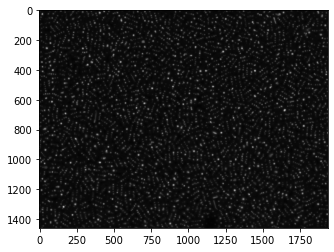

In [ ]:
plt.imshow(total_gfp[8],cmap='gray')

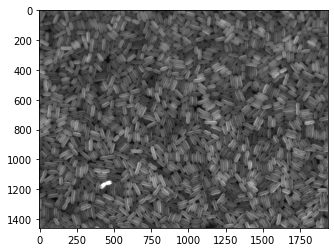

In [ ]:
plt.imshow(total_dsred[8],cmap='gray')

In [ ]:
def segment(image,diameter=[7,20,20]):
  #brightfield = image[0,2,:,:,0]
  dsred = image[0,1,:,:,0]
  gfp = image[0,0,:,:,0]
  gfp_mask, flow, style, diam_ = model.eval(gfp,diameter=diameter[0])
  dsred_mask, flow, style, diam = model.eval(dsred,diameter=diameter[1])
  #bf_mask, flow, style, diam = model.eval(dsred,diameter=diameter[2])
  return gfp_mask, dsred_mask

In [ ]:
# make masks of carboxysomes and cells
# It would be a good idea to save these as .npy files and then load them instead of repeating this
gfp_masks = []
dsred_masks = []
for file in images:
  image = czifile.imread(file)
  gfp_mask, dsred_mask= segment(image)
  gfp_masks.append(gfp_mask) 
  dsred_masks.append(dsred_mask)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3829: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


In [ ]:
len(gfp_masks)

8

**Saving the masks in my gdrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
induced24_gfp_masks = np.asarray(gfp_masks)
induced24_dsred_masks = np.asarray(dsred_masks)

In [ ]:
np.save('induced24_gfp_masks.npy',induced24_gfp_masks)
np.save('induced24_dsred_masks.npy',induced24_dsred_masks)

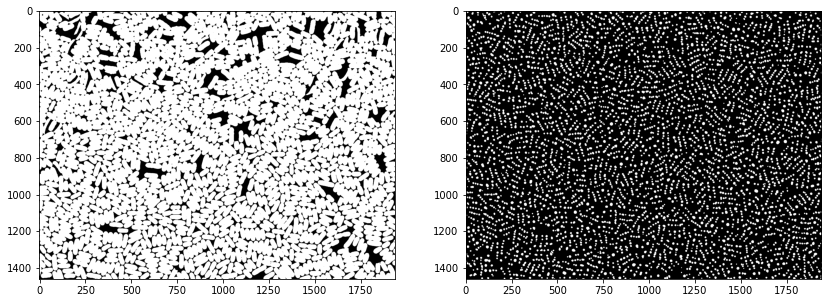

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[0] > 0,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[0] > 0,cmap='gray')

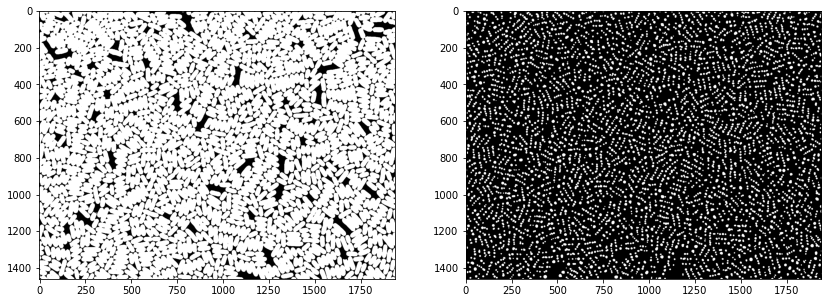

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[1] > 0,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[1] > 0,cmap='gray')

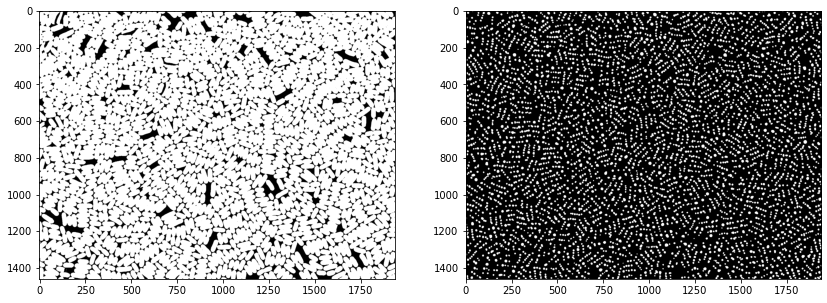

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[2] > 0,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[2] > 0,cmap='gray')

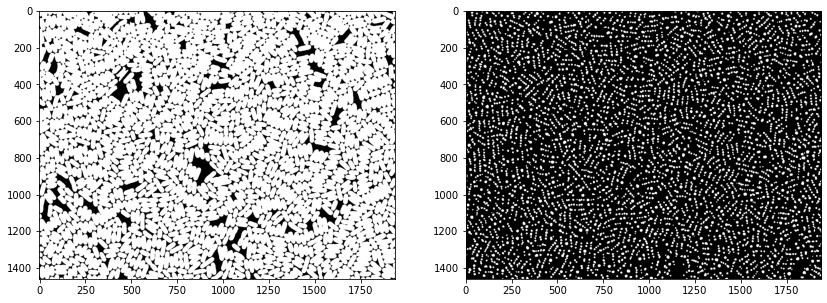

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[3] > 0,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[3] > 0,cmap='gray')

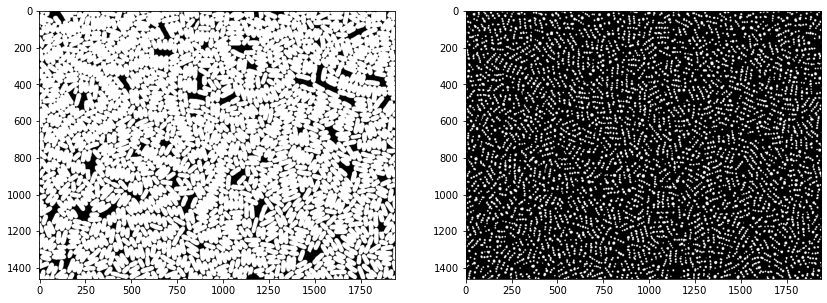

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[4] > 0,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[4] > 0,cmap='gray')

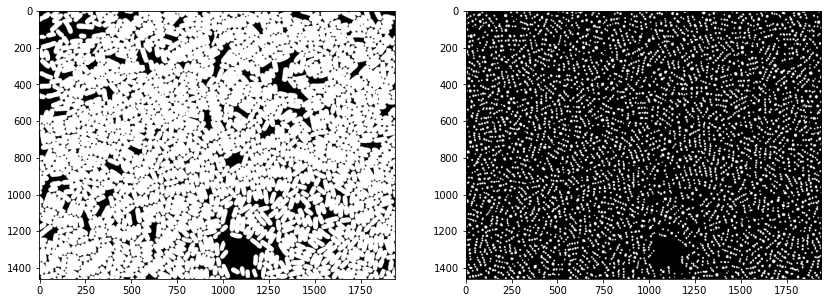

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[5] > 0,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[5] > 0,cmap='gray')

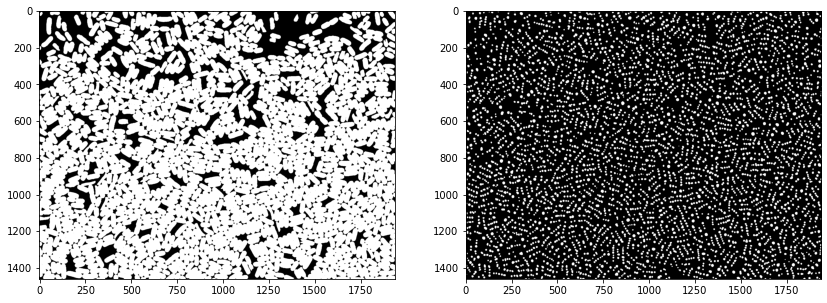

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[6] > 0,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[6] > 0,cmap='gray')

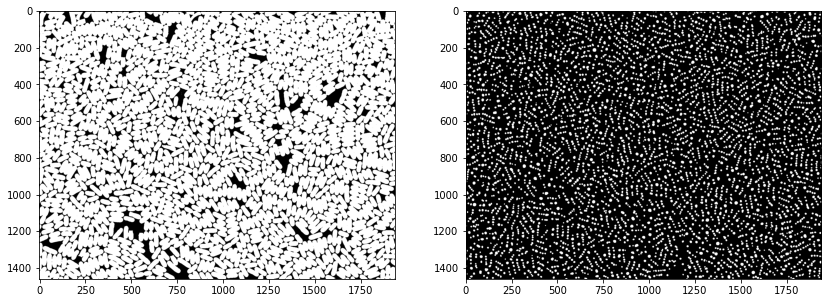

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[7] > 0,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[7] > 0,cmap='gray')

IndexError: ignored

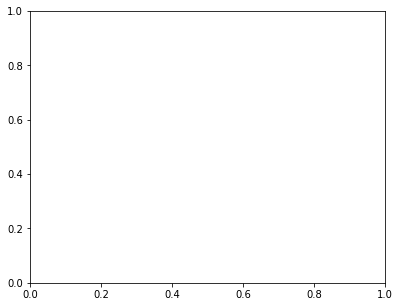

In [ ]:
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(121)
plt.imshow(dsred_masks[8] >0 ,cmap='gray')
ax = fig.add_subplot(122)
plt.imshow(gfp_masks[8] > 0,cmap='gray')